In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.shape

(10000, 14)

In [29]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [30]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [33]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [34]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [35]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
# X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
# states = pd.get_dummies(df['Geography'],drop_first = True)
# gender = pd.get_dummies(df['Gender'],drop_first = True)
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)

In [39]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [44]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [45]:
X= df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain']]

In [46]:
y = df['Exited']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [49]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
X_train

array([[-1.91192626,  1.16762477,  1.03081677, ..., -1.09066618,
        -0.57932976, -0.56943195],
       [ 0.20300707, -0.55310554,  1.03081677, ...,  0.91687083,
        -0.57932976, -0.56943195],
       [-1.6849578 ,  0.49845187,  0.33826303, ...,  0.91687083,
        -0.57932976,  1.7561361 ],
       ...,
       [ 1.18309812,  0.40285574,  1.37709364, ...,  0.91687083,
        -0.57932976, -0.56943195],
       [ 0.33712479,  0.02047123, -1.04684444, ..., -1.09066618,
         1.72613262, -0.56943195],
       [ 1.15214788,  0.68964413,  0.33826303, ...,  0.91687083,
         1.72613262, -0.56943195]])

In [51]:
X_test

array([[ 0.65694398,  1.35881703, -1.39312131, ...,  0.91687083,
         1.72613262, -0.56943195],
       [ 1.59576804,  1.07202864,  1.37709364, ...,  0.91687083,
         1.72613262, -0.56943195],
       [ 0.20300707, -0.36191329, -0.70056757, ..., -1.09066618,
        -0.57932976, -0.56943195],
       ...,
       [ 1.3275326 , -1.22227844, -0.3542907 , ..., -1.09066618,
        -0.57932976,  1.7561361 ],
       [-0.85961797, -0.36191329, -0.00801384, ..., -1.09066618,
        -0.57932976, -0.56943195],
       [-0.59138252, -0.7442978 ,  1.37709364, ...,  0.91687083,
        -0.57932976, -0.56943195]])

In [54]:
import keras

In [55]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [56]:
classifier = Sequential()

In [57]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform"))
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 [==============================] - 4s 2ms/step - loss: 0.4806 - accuracy: 0.7990
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.7999
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4160 - accuracy: 0.8076
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4135 - accuracy: 0.8249
Epoch 5/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4110 - accuracy: 0.8283
Epoch 6/50
700/700 [==============================] - 5s 7ms/step - loss: 0.4099 - accuracy: 0.8323
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.8323
Epoch 8/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4069 - accuracy: 0.8344
Epoch 9/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4059 - accuracy: 0.8353
Epoch 10/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8361

In [59]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 4ms/step


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[2288,   76],
       [ 451,  185]])

In [61]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8243333333333334

Text(95.72222222222221, 0.5, 'Truth')

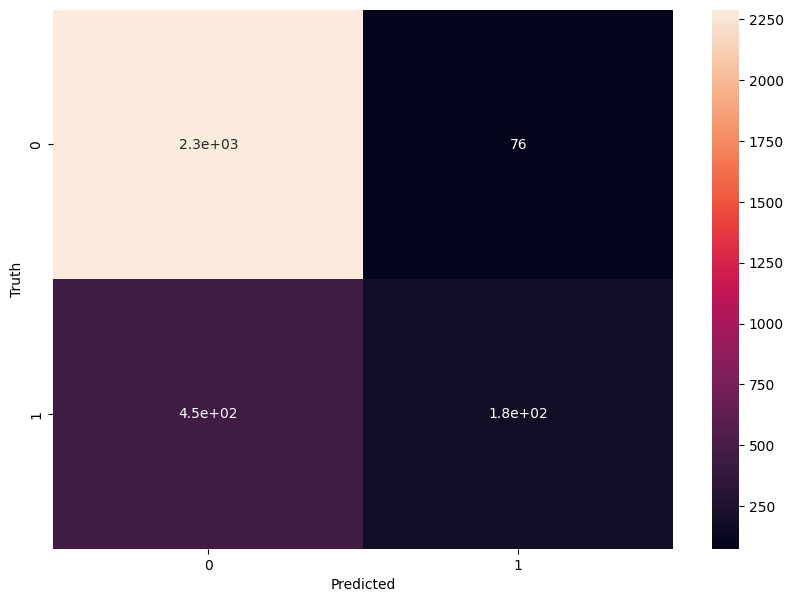

In [62]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2364
           1       0.71      0.29      0.41       636

    accuracy                           0.82      3000
   macro avg       0.77      0.63      0.65      3000
weighted avg       0.81      0.82      0.79      3000

